# **Project Name : Linear Regression Model for Insurance Charge Estimation**

#### **Project Type: Supervised Machine Learning — Regression**
#### **Author: Vaishnavi Jain**

## **Project Summary:**
* **Aim:** This project aims to predict insurance charges using a linear regression model. The data includes different factors like age, BMI, whether the person smokes, past medical consultations, and hospital expenses.
* **Model**: Built a linear regression model to predict insurance charges based on factors like age, BMI, smoking, and medical history.
* **Data Cleaning:** Cleaned data by filling missing values and removing outliers using the IQR method.
* **Multicollinearity:** Reduced multicollinearity by calculating VIF and dropping highly correlated features.
* **Encoding:** Encoded categorical variables into numeric values for model compatibility.
* **Evaluation:** Trained and tested the model, achieving around 84% R-squared, indicating good prediction accuracy.



## **Problem Statement:**
Insurance companies need accurate charge predictions despite challenges like missing data, outliers, and correlated features. This project uses data cleaning and linear regression model to improve prediction accuracy.

## ***Let's Begin !!***

## **Import Libraries**

In [2]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Modeling Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Statistical Analysis Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **Data Loading**

In [5]:
# Upload CSV file in Colab
from google.colab import files
uploaded=files.upload()

Saving new_insurance_data.csv to new_insurance_data.csv


In [6]:
# Load the insurance dataset from CSV file
insurance = pd.read_csv('new_insurance_data.csv')

In [7]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


## **Initial Exploration and Missing Values Check**

In [8]:
#Shape inspection
print("Dataset shape:", insurance.shape)

Dataset shape: (1338, 13)


In [9]:
#Display information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [10]:
# Check for missing values in each column
insurance.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


Null values are present in the dataset

## **Fill Missing Values**

In [11]:
# Fill missing values
# For categorical columns, fill with mode; for numerical, fill with mean
for col in insurance.columns:
    if col == 'children':
        insurance[col] = insurance[col].fillna(insurance[col].mode()[0])
    elif insurance[col].dtype == 'object':
        insurance[col] = insurance[col].fillna(insurance[col].mode()[0])
    else:
        insurance[col] = insurance[col].fillna(insurance[col].mean())

categorical columns are filled with mode() & numerical with mean()

In [12]:
# Confirm no missing values remain
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


Now, there is no null values

## **Outlier Detection and Removal**

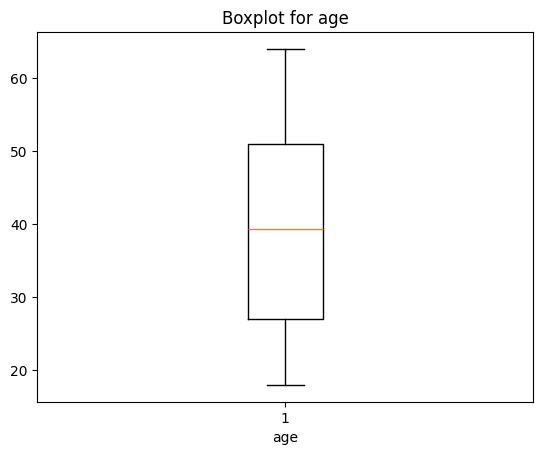

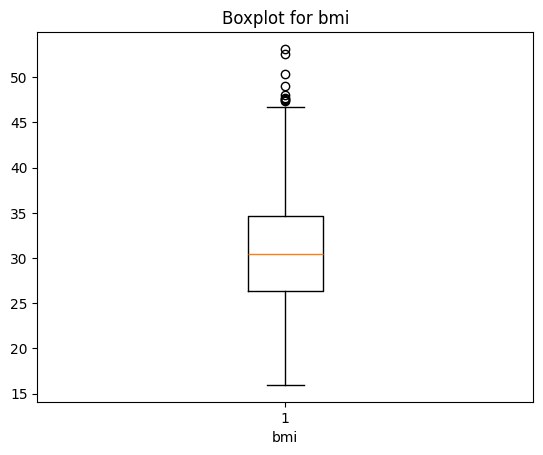

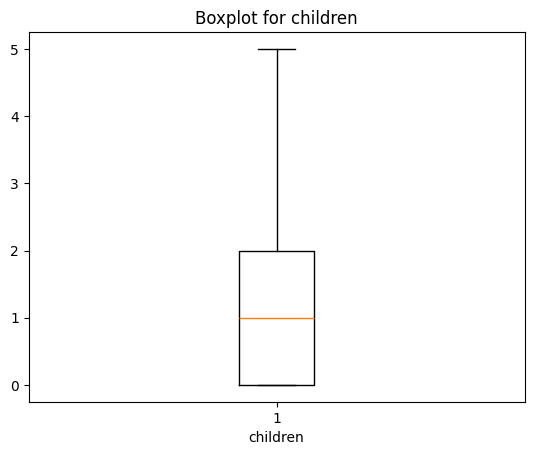

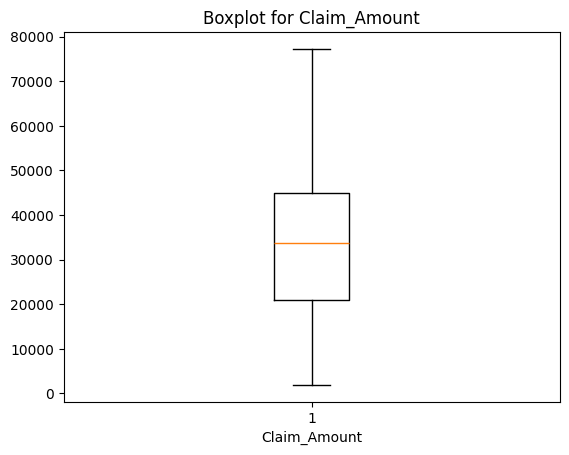

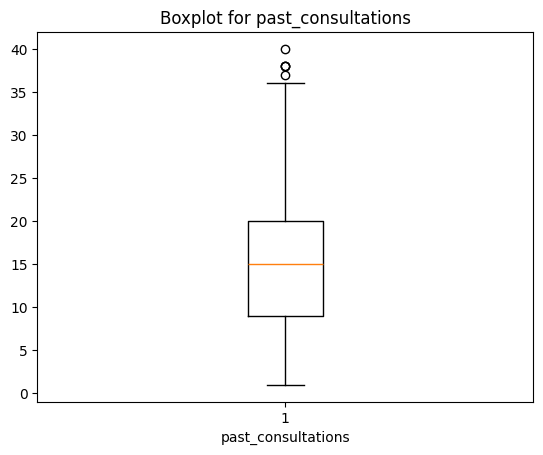

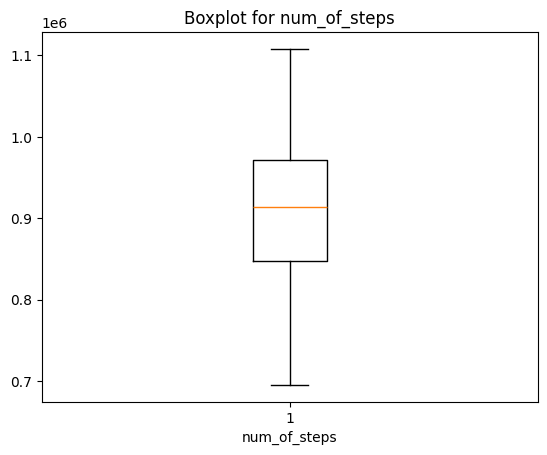

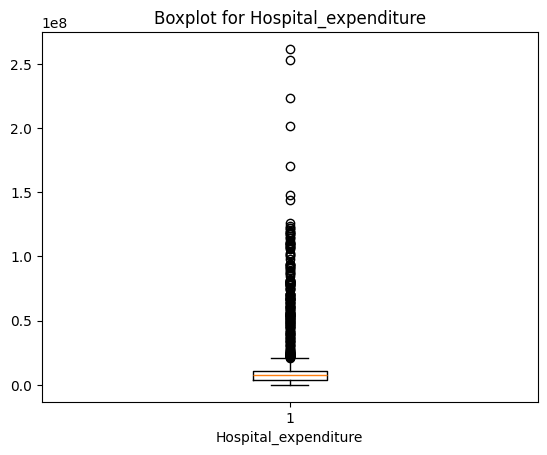

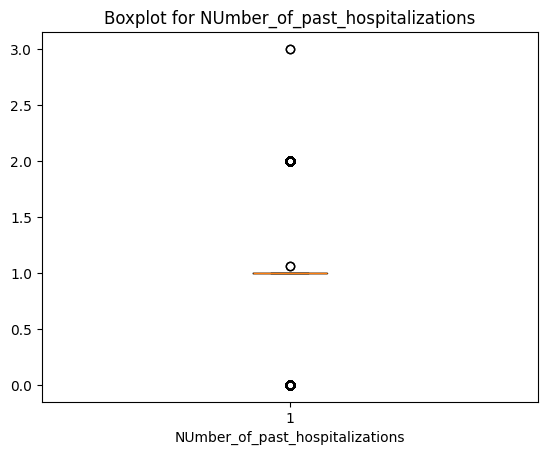

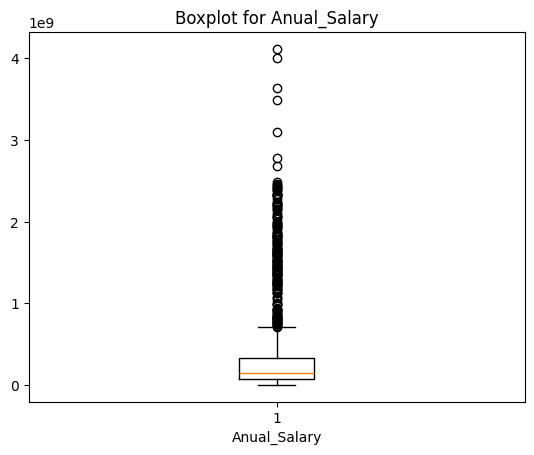

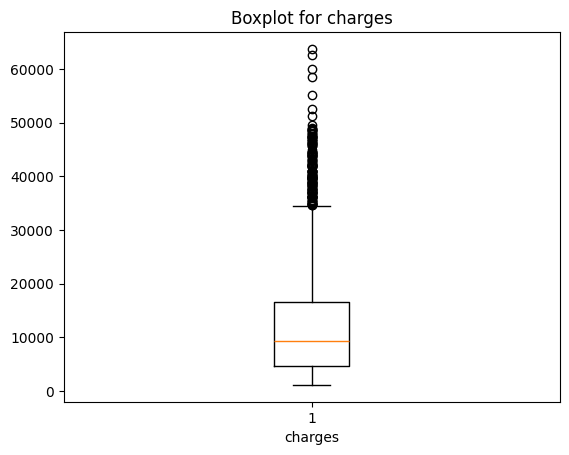

In [13]:
# Plot boxplots for numerical columns to detect outliers
num_cols = insurance.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.boxplot(insurance[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

We will remove outliers from columns bmi, past_consultations, Hospital_expenditure, Anual_Salary in data

In [14]:
# Define a function to remove outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

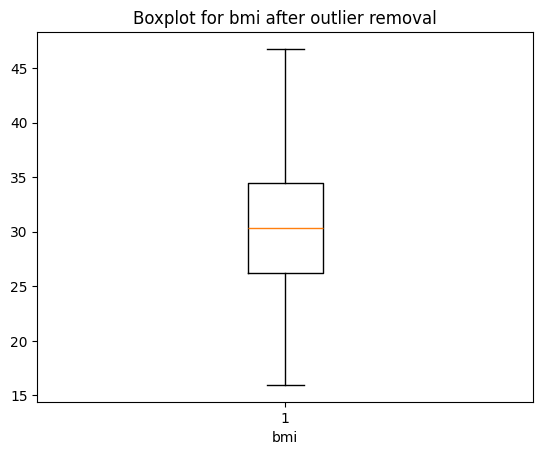

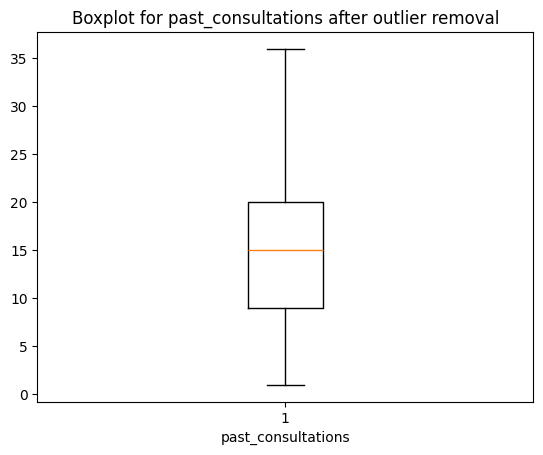

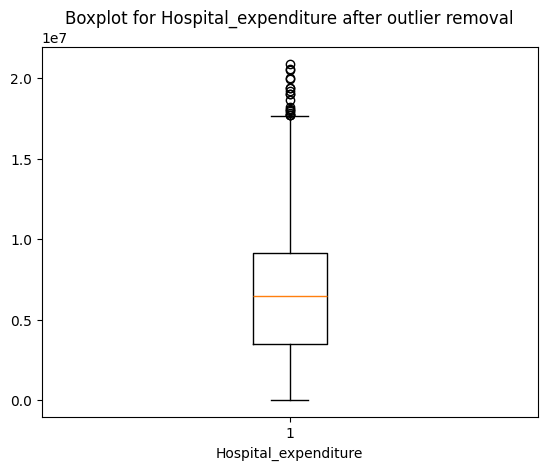

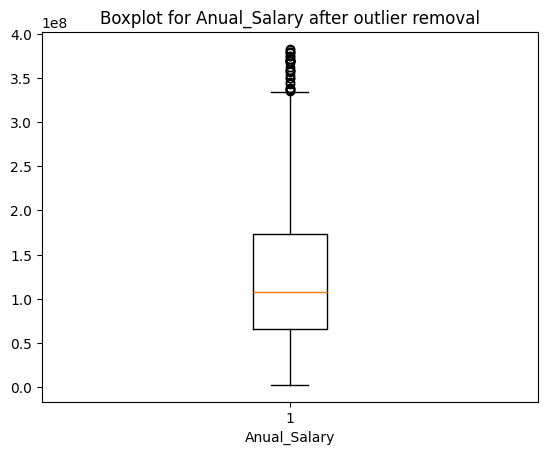

In [15]:
# Remove outliers for selected numerical columns
for col in ['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']:
    insurance = remove_outliers(insurance, col)
    plt.boxplot(insurance[col])
    plt.title(f'Boxplot for {col} after outlier removal')
    plt.xlabel(col)
    plt.show()

Outliers are removed as shown in Boxplots

In [16]:
#Shape after removing outliers
print("Dataset shape after outlier removal:", insurance.shape)

Dataset shape after outlier removal: (1030, 13)


## **Correlation Matrix Visualization**

In [17]:
# Calculate and plot correlation matrix of numerical features
num_cols = insurance.select_dtypes(include=['number'])
corr_matrix = num_cols.corr()
corr_matrix

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.047664,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.003515,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.047664,0.003515,1.000000,0.044480,0.046549,0.229850,-0.005459,0.314249,0.067953,0.140763
Claim_Amount,0.117750,0.008343,0.044480,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.046549,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.229850,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.005459,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.314249,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.067953,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.140763,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


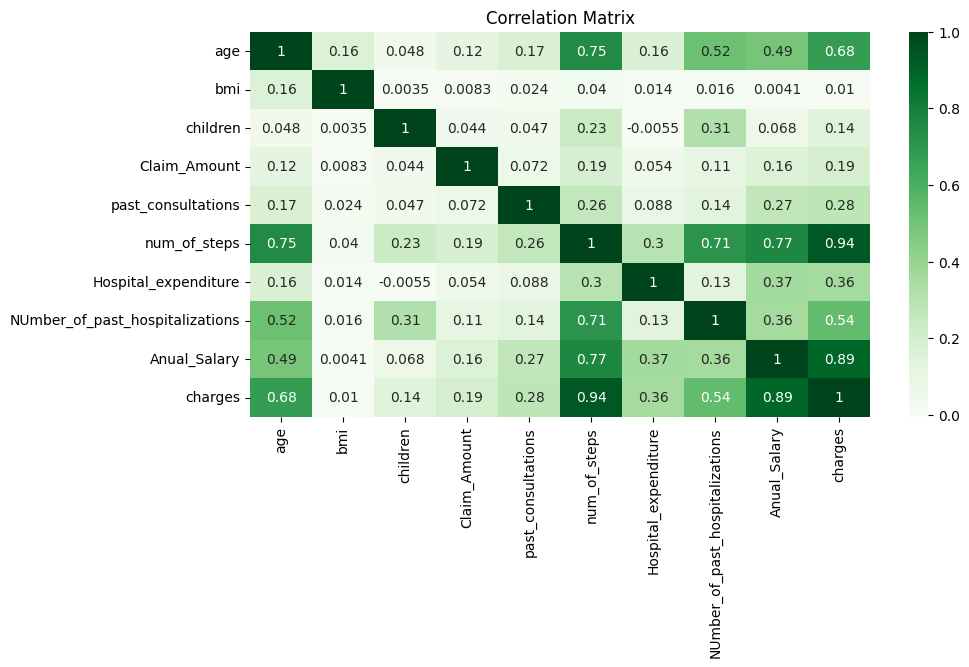

In [18]:
#Plot heatmap of correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

Observations:
* Strong correlations exist among charges, num_of_steps, Anual_Salary, and age, indicating these are key influencing factors.
* Moderate relationships are seen between age, hospitalizations, and expenditure-related variables.
* Weak or no correlation for bmi, children, and Claim_Amount, suggesting limited impact on other variables.

## **Multicollinearity Check with VIF**

In [19]:
# 1st try
col_list = []
for col in insurance.columns:
  if((insurance[col].dtypes != 'object') & (col != 'charges')): # only num colms except target
    col_list.append(col)
X = insurance[col_list]
vif_data = pd.DataFrame() # Empty datframe
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,age,15.435201
1,bmi,26.331227
2,children,2.011215
3,Claim_Amount,5.678867
4,past_consultations,6.258064
5,num_of_steps,61.575105
6,Hospital_expenditure,5.203725
7,NUmber_of_past_hospitalizations,12.014458
8,Anual_Salary,5.481760


column 'num_of_steps' have high VIF score, we will drop this column.

In [20]:
insurance = insurance.drop(['num_of_steps'], axis = 1)

In [21]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [22]:
# trail 2
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
  if((insurance[col].dtypes != 'object') & (col != 'charges')): # only num colms except target
    col_list.append(col)
X = insurance[col_list]
vif_data = pd.DataFrame() # Empty datframe
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,age,14.470121
1,bmi,12.250946
2,children,1.999135
3,Claim_Amount,5.244505
4,past_consultations,5.842324
5,Hospital_expenditure,4.929540
6,NUmber_of_past_hospitalizations,10.647049
7,Anual_Salary,5.380825


Column 'age' have high VIF score and drop it

In [23]:
insurance = insurance.drop(['age'], axis = 1)

In [24]:
# trail 3
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
  if((insurance[col].dtypes != 'object') & (col != 'charges')): # only num colms except target
    col_list.append(col)
X = insurance[col_list]
vif_data = pd.DataFrame() # Empty datframe
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,bmi,10.320759
1,children,1.962889
2,Claim_Amount,5.228978
3,past_consultations,5.822103
4,Hospital_expenditure,4.928909
5,NUmber_of_past_hospitalizations,8.288086
6,Anual_Salary,4.722137


column 'bmi' have high VIF score & drop it

In [25]:
insurance = insurance.drop(['bmi'], axis = 1)

In [26]:
# trail 4
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
  if((insurance[col].dtypes != 'object') & (col != 'charges')): # only num colms except target
    col_list.append(col)
X = insurance[col_list]
vif_data = pd.DataFrame() # Empty datframe
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,children,1.961541
1,Claim_Amount,4.547852
2,past_consultations,5.048863
3,Hospital_expenditure,4.492609
4,NUmber_of_past_hospitalizations,7.214712
5,Anual_Salary,4.687251


column 'NUmber_of_past_hospitalizations' have high VIF score & so drop it off

In [27]:
insurance = insurance.drop(['NUmber_of_past_hospitalizations'], axis = 1)

In [28]:
# trail 5
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
  if((insurance[col].dtypes != 'object') & (col != 'charges')): # only num colms except target
    col_list.append(col)
X = insurance[col_list]
vif_data = pd.DataFrame() # Empty datframe
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,children,1.707038
1,Claim_Amount,4.152078
2,past_consultations,4.666826
3,Hospital_expenditure,4.320412
4,Anual_Salary,4.280573


Now VIF score for other columns are less that 5 ---- Good for Regression model (Can now deal with overfitting)

## **Encode Categorical Variables**

In [29]:
# Encode categorical columns using LabelEncoder
cat_cols = insurance.select_dtypes(include=['object']).columns
le = LabelEncoder()

In [30]:
for col in cat_cols:
    insurance[col] = le.fit_transform(insurance[col])

In [31]:
insurance

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,1,0.0,0,29087.54313,17.0,4.720921e+06,5.578497e+07,2,1121.87390
1,1,0.0,0,39053.67437,7.0,4.329832e+06,1.370089e+07,2,1131.50660
2,1,0.0,0,39023.62759,19.0,6.884861e+06,7.352311e+07,2,1135.94070
3,1,0.0,0,28185.39332,11.0,4.274774e+06,7.581968e+07,2,1136.39940
4,1,0.0,0,14697.85941,16.0,3.787294e+06,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...
1046,0,1.0,1,51168.25474,23.0,1.665982e+07,3.712188e+08,2,19107.77960
1048,1,3.0,1,46619.40230,27.0,1.361938e+07,3.812895e+08,3,19199.94400
1050,1,0.0,1,24382.58056,21.0,1.028991e+07,3.745310e+08,2,19350.36890
1062,0,2.0,1,21596.43846,10.0,1.083030e+07,3.696849e+08,0,19798.05455


## **Prepare Features and Target Variables**

In [32]:
# Define feature columns and target variable
X = insurance[['sex', 'children', 'smoker', 'Claim_Amount', 'past_consultations',
               'Hospital_expenditure', 'Anual_Salary', 'region']]
y = insurance['charges']

## **Splitting data**

In [33]:
# Split data into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [34]:
x_train

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
746,1,0.0,0,25238.363470,11.0,2.086869e+06,1.649883e+08,1
641,0,0.0,0,37222.476360,9.0,6.062378e+06,9.657123e+07,3
999,1,1.0,1,30825.190070,11.0,5.923489e+06,3.029514e+08,1
281,0,0.0,0,9560.754493,15.0,3.185350e+06,7.490390e+07,2
802,0,2.0,0,12992.139950,24.0,4.075903e+06,2.061268e+08,0
...,...,...,...,...,...,...,...,...
279,0,1.0,0,20150.675120,9.0,1.747107e+05,6.328892e+07,3
768,1,0.0,0,9582.708574,11.0,1.046259e+07,1.850292e+08,3
841,1,0.0,0,31405.793590,12.0,9.380141e+06,2.118739e+08,0
561,1,2.0,0,9816.604000,12.0,8.134594e+05,1.287152e+08,3


In [35]:
x_test

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
752,0,0.0,0,33948.245030,14.0,2852368.952,1.322794e+08,3
723,0,0.0,0,55314.076930,22.0,8962514.811,1.811501e+08,0
177,0,2.0,0,5496.365185,7.0,4728536.620,5.833210e+07,2
834,0,0.0,0,22778.601030,24.0,5349680.612,2.223391e+08,3
718,0,2.0,0,11951.090250,4.0,5368280.300,1.787119e+08,2
...,...,...,...,...,...,...,...,...
627,1,0.0,0,49140.254220,10.0,4776407.417,9.172299e+07,0
993,0,3.0,0,20212.558840,16.0,4530674.378,2.787266e+08,2
426,0,1.0,0,45637.390130,5.0,9278303.409,6.394902e+07,2
895,1,2.0,0,12770.132490,24.0,4895703.017,2.081729e+08,2


In [36]:
y_train

,charges
746,10594.50155
641,8932.08400
999,16450.89470
281,4185.09790
802,11396.90020
...,...
279,4149.73600
768,10965.44600
841,11938.25595
561,7740.33700


In [37]:
y_test

,charges
752,10704.47000
723,10197.77220
177,2801.25880
834,11848.14100
718,10107.22060
...,...
627,8688.85885
993,16085.12750
426,5976.83110
895,12925.88600


## **Model Build and Training**

In [38]:
# Create Linear Regression model and train on training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## **Model Prediction and Evaluation**

In [39]:
# Predict target values for test set
y_pred = model.predict(x_test)
y_pred

array([ 7464.94951977, 10836.97003301,  4359.44076362, 11869.1651193 ,
        9851.95959234,  2976.4196269 ,  7393.12636581,  4031.66884798,
        1775.61607479,  1771.97808831,  9299.51399402,  6348.9238202 ,
        6989.71007876,  6713.88494354,  7160.24992463,  8051.91471178,
        5090.34306911, 11918.39167637, 10832.5404914 ,  3890.68540996,
        4870.69260818,  6880.80219345,  5025.89032748, 10728.80025431,
        8277.94403657,  9100.90071464,  3504.37800511,  2239.18830268,
        7841.97830589,  6505.40625561,  8787.84024187,  9575.33825242,
        7381.82818157,  2841.33530934, 10876.95193722,  6186.55241165,
        2658.50328841,  5723.63553676,  8149.56805441,  3607.17710397,
        2824.30550452,  7679.34608254,  9118.485343  ,  4647.58955743,
        7291.85873631,  6184.71857857,  9086.61522122,  9907.49813168,
        1563.67538967,  4911.09918553, 11020.46803486, 10785.67293572,
       10479.24633506,  4566.17554097,  7362.64670792,  4834.15365457,
      

In [40]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.8410


An **R² score of 0.841** indicates that the model performs well in predicting insurance charges.

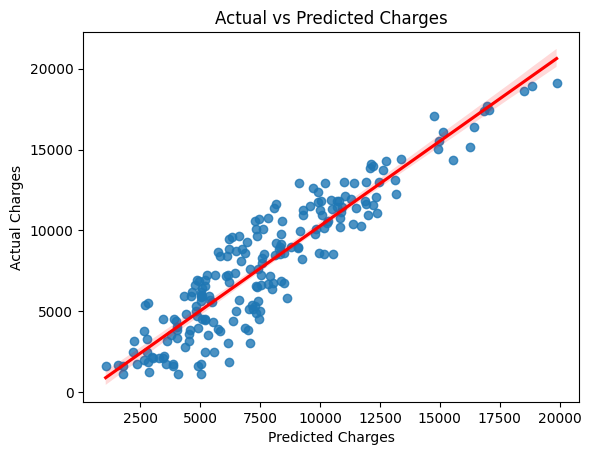

In [41]:
# Plot actual vs predicted charges
sns.regplot(x=y_pred, y=y_test, line_kws={"color":"red"})
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

Observations:
* **Strong Linear Fit:** Predicted charges closely align with actual values, showing a strong positive correlation and good model performance.
* **Some Variability:** Minor spread exists around the regression line, especially in mid-range charges, suggesting potential room for improvement.
* **No Major Outliers**: Data points follow a consistent pattern with no extreme deviations, indicating model stability and reliability.

In [42]:
# Display model coefficients
print("Model Coefficients:", model.coef_)

Model Coefficients: [-3.40996648e+02  3.16910371e+02 -2.15111141e+02  1.31241439e-02
  3.05077042e+01  6.51511017e-05  4.53369275e-05 -7.79404903e+01]


In [43]:
# Display model intercept
print("Model Intercept:", model.intercept_)

Model Intercept: 643.144388093805


## **Error Analysis**

In [44]:
# Create a dataframe with actual, predicted values and errors
errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
errors['Error'] = errors['Actual'] - errors['Predicted']
errors.head()

,Actual,Predicted,Error
752,10704.4700,7464.949520,3239.520480
723,10197.7722,10836.970033,-639.197833
177,2801.2588,4359.440764,-1558.181964
834,11848.1410,11869.165119,-21.024119
718,10107.2206,9851.959592,255.261008


# **Business Conclusion**

* This project created a linear regression model that can predict insurance charges accurately with an R² score of 84%. The model uses important factors like smoking habits, hospital expenses, and annual income to estimate costs.

* It can help insurance companies to:

 1. Set fair premium rates based on customer health and lifestyle.

 2. Make better decisions when approving policies or handling claims.

 3. Reduce financial risks by identifying people who may need more medical support.

Overall, this model can be used in real-life business to improve pricing and make the insurance process more efficient and reliable.